In [31]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import os
import pandas as pd
os.chdir('C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\CHI 2023\\emotunz')

In [50]:
path = 'C:\\Users\\anita\\OneDrive\\Bureaublad\\Anita\'s stuff II\\Tilburg university\\Brainihacks\\CHI 2023\\emotunz\\sadanita\\5.csv'


with open(path) as file:
    data = file.readlines()
    

eeg = data[0].replace('\'', '')
eeg = eeg.split(',')

In [51]:
count = 0
#'FZ', 'C3', 'CZ', 'C4', 'PZ', 'F3', 'OZ', 'F4'
Fz = []
C3 = []
Cz = []
C4 = []
Pz = []
F3 = []
POz = []
F4 = []

for i in range(len(eeg)):
    if count == 0:
        Fz.append(eeg[i])
    elif count == 1:
        C3.append(eeg[i])
    elif count == 2:
        Cz.append(eeg[i])
    elif count ==3:
        C4.append(eeg[i])
    elif count == 4:
        Pz.append(eeg[i])
    elif count == 5:
        F3.append(eeg[i])
    elif count == 6:
        POz.append(eeg[i])
    elif count ==7:
        F4.append(eeg[i])
    count += 1
    if count == 8:
        count = 0
        
        

In [52]:
rawEEG = pd.DataFrame({'Fz':Fz, 'C3': C3, 'Cz': Cz, 'C4':C4, 'Pz':Pz, 'F3':F3, 'POz':POz, 'F4':F4})
rawEEG

,Fz,C3,Cz,C4,Pz,F3,POz,F4
0,0,0,0,0,0,0,0,0
1,-169105.171875,-750000.125,226312.140625,-444457.03125,93433.0703125,90474.234375,347335.65625,42149.7578125
2,750000.0625,-750000.125,342553.5625,-311693.75,37544.13671875,750000.0625,575511.0625,750000.0625
3,750000.0625,-750000.125,403373.375,-186507.609375,127841.7890625,750000.0625,601088.625,750000.0625
4,704987.5625,-355117.375,431317.53125,165288.75,332746.6875,750000.0625,648083.5625,750000.0625
...,...,...,...,...,...,...,...,...
37181,129342.1328125,259456.640625,381211.34375,336862.625,708971.6875,139133.71875,244545,142929.84375
37182,129345.796875,259641.90625,381213.84375,337014.96875,708960.375,139152.84375,244561.984375,142944.859375
37183,129355.6328125,259475.609375,381081,336850.625,708953,139178.859375,244451.46875,142970.171875
37184,129370.3828125,258622.484375,380708.875,336099.25,708939.0625,139224.28125,244107.703125,143015.140625


In [53]:
def FrontalAlphaAsymmetry(left, right):
    epochs = []
    lefthem = []
    righthem = []
    #sample freq = 250 Hz
    #8 seconds = 2000 samples per epoch
    count = 0
    for i in range(len(left)):
        
       
        lefthem.append(left[i])
        righthem.append(right[i])
        
        
        if count == 2000:
            FFTLefthem = np.fft.fft(lefthem).real
            FFTRighthem = np.fft.fft(righthem).real
            
            FFTLefthem = np.nanmean(FFTLefthem[8:12])
            #print(FFTLefthem)
            FFTRighthem = np.nanmean(FFTRighthem[8:12])
        
            FrontalAlpha = np.log10(abs(FFTRighthem) /abs(FFTLefthem))
            epochs.append(FrontalAlpha)
            count = 0
            lefthem = []
            righthem = []
        count += 1
        
        
        
    return epochs

FAA = FrontalAlphaAsymmetry(rawEEG['C3'], rawEEG['C4'])


In [28]:
print(FAA)

[0.4941668664827032, -2.4155899761503052, -2.4781680864057813, -1.767147539694694, -1.3441378772193902, -1.40364819275929, -0.04568054134508506, -1.406228343994099, -1.661323308984144, -1.1735000977794787, -1.0255018618861602, -1.0580356876970405, -1.7952538832516498, -1.676092034317788, -1.4522613936204083, -3.291956480178724]


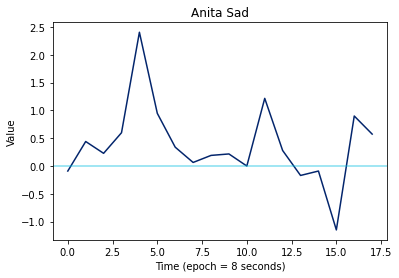

In [54]:
plt.plot(FAA, color = '#03256C')
plt.title('Anita Sad')
plt.xlabel('Time (epoch = 8 seconds)')
plt.ylabel('Value')


plt.axhline(y = 0, color = '#06BEE1', alpha = 0.5)

plt.savefig('FAA Plot Anita Sad', dpi=300)
